In [1]:
#Author: ML Tlachac, 2024
#Paper: Mental Health and Mobile Communication Profiles of Crowdsourced Participants
#github: https://github.com/mltlachac/Communication-Profiles

#import Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

from sklearn.cluster import DBSCAN
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    
from sklearn.cluster import AgglomerativeClustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

#should remove pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data1 = pd.read_csv("summaryDepreST-CAT.csv")
data3 = pd.read_csv("featureSet2weeksDepreST-CAT.csv")
data = data1.merge(data3, on = 'id')
data1 = data1.drop(columns = "id") #new line of code
print(data.shape) #outputs (rows, columns)
print(data.columns)
data.head() #only displays top 5 rows

(369, 580)
Index(['id', 'inCalls', 'outCalls', 'allCalls', 'inText', 'outText', 'allText',
       'allLogs', 'phq9_x', 'gad7_x',
       ...
       'outCalls0_Wavelet variance_2', 'outCalls0_Wavelet variance_3',
       'outCalls0_Wavelet variance_4', 'outCalls0_Wavelet variance_5',
       'outCalls0_Wavelet variance_6', 'outCalls0_Wavelet variance_7',
       'outCalls0_Wavelet variance_8', 'outCalls0_Zero crossing rate',
       'phq9_y', 'gad7_y'],
      dtype='object', length=580)


,id,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9_x,gad7_x,...,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate,phq9_y,gad7_y
0,8SEHPRKH5,2699,1635,4334,271,159,430,4764,11,9,...,4.045134e+05,3.154076e+05,2.307977e+05,177738.097688,147068.120980,128451.466641,116002.530161,4.0,11,9
1,9UK1BSBLV,1963,37,2000,3497,104,3601,5601,6,1,...,6.075872e+02,4.647918e+02,2.988297e+02,182.340760,112.353802,71.603635,47.553689,6.0,6,1
2,8LOAAXQ52,1820,1319,3139,6806,0,6806,9945,8,5,...,7.011985e+06,4.160517e+06,1.927105e+06,939889.397772,623484.349712,575110.868332,613022.998698,2.0,8,5
3,3NL2J473W,1653,347,2000,548,243,791,2791,12,8,...,6.962548e+02,2.341504e+02,7.659223e+01,39.255697,40.123745,50.110467,60.012478,5.0,12,8
4,OVW13SMGC,1648,352,2000,1544,812,2356,4356,3,5,...,3.925101e+02,2.744714e+02,1.691722e+02,104.908265,69.412641,49.783911,38.477216,2.0,3,5


# Correlation

In [3]:
#correlation plot for a subset of the data
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2) #set_precision(2)

,inCalls,outCalls,allCalls,inText,outText,allText,allLogs,phq9,gad7
inCalls,1.00,0.63,0.94,0.39,0.15,0.37,0.56,0.05,0.04
outCalls,0.63,1.00,0.86,0.38,0.22,0.38,0.55,0.09,0.07
allCalls,0.94,0.86,1.00,0.42,0.20,0.42,0.62,0.07,0.06
inText,0.39,0.38,0.42,1.00,0.38,0.95,0.93,0.05,0.09
outText,0.15,0.22,0.20,0.38,1.00,0.66,0.62,0.03,0.07
allText,0.37,0.38,0.42,0.95,0.66,1.00,0.97,0.05,0.10
allLogs,0.56,0.55,0.62,0.93,0.62,0.97,1.00,0.06,0.10
phq9,0.05,0.09,0.07,0.05,0.03,0.05,0.06,1.00,0.85
gad7,0.04,0.07,0.06,0.09,0.07,0.10,0.10,0.85,1.00


# PCA

In [4]:
#isolate features from ids and targets
features = data3[data3.columns[1:-2]] #features are from columns 1 from the start and 2 from the end
#ids = data3[data3.columns[0:1]] #ids are the first column
targets = data3[data3.columns[-2:]] #targets are the last two columns
cnames = features.columns
print(features.shape) #(rows,columns)
features.head() #first 5 rows only

(369, 568)


,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,0.142857,...,1044.461838,595.378697,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0
1,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,0.142857,...,107303.053660,87506.881312,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0
2,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,0.142857,...,224107.095817,218449.207781,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0
3,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,0.142857,...,53971.533653,50730.442089,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0
4,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
sfeatures = pd.DataFrame(np_scaled, columns = cnames)
print(sfeatures.shape)
sfeatures.head()

(369, 568)


,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,0.000045,0.001576,0.000045,0.000000,0.222222,1.0,0.000000,0.000,0.0,0.0,...,0.000029,0.000029,0.000031,0.000024,0.000019,0.000016,0.000014,0.000013,0.000013,0.6
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,...,0.002951,0.004306,0.004751,0.001856,0.000771,0.000436,0.000360,0.000374,0.000417,0.4
2,0.017641,0.198108,0.017641,0.434450,0.222222,1.0,0.095238,0.152,0.0,0.0,...,0.006162,0.010749,0.013638,0.009505,0.007069,0.005930,0.005387,0.005122,0.004989,0.4
3,0.062112,0.355229,0.062112,0.479390,0.222222,1.0,0.095238,0.280,0.0,0.0,...,0.001484,0.002496,0.002743,0.001495,0.000908,0.000673,0.000582,0.000552,0.000548,0.8
4,0.004332,0.088807,0.004332,0.462298,0.222222,1.0,0.023810,0.064,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [6]:
#perform PCA with 2 PCs
numberOfFeatures = 2 #number of PCs
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n+1))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
var = pca.explained_variance_ratio_
print("Amount of variance explained: " + str(var)) #prints variance of PC1 and PC2 seperately

Amount of variance explained: [0.30028334 0.12899279]


In [7]:
pca_exp = pd.DataFrame(pca.components_, columns = cnames).transpose()
pca_exp.columns = ["PC1", "PC2"]
pca_exp.sort_values(by = 'PC1') #use this table for PC1 values

,PC1,PC2
inCalls0_Spectral variation,-0.151505,0.025188
outCalls0_Spectral variation,-0.151309,0.021143
inCalls0_Histogram_5,-0.119269,0.051664
outCalls0_Histogram_5,-0.115953,0.053099
outCalls0_MFCC_0,-0.078408,0.018482
...,...,...
outCalls0_Maximum frequency,0.181192,-0.034089
outCalls0_Spectral roll-off,0.181192,-0.034089
inCalls0_Wavelet entropy,0.182980,-0.041464
inCalls0_Maximum frequency,0.184026,-0.040968


In [8]:
pca_exp.sort_values(by = 'PC2') #use this table to for PC2 values

,PC1,PC2
outTexts0_Spectral variation,-0.060930,-0.231293
outTexts0_Histogram_5,-0.047168,-0.141097
outTexts0_Spectral slope,-0.037399,-0.103784
outTexts0_MFCC_0,-0.021933,-0.090240
outTexts0_Spectral decrease,-0.024463,-0.068189
...,...,...
outTexts0_Spectral entropy,0.058698,0.225428
outTexts0_Spectral spread,0.064835,0.241294
outTexts0_Wavelet entropy,0.074409,0.277711
outTexts0_Maximum frequency,0.074740,0.278479


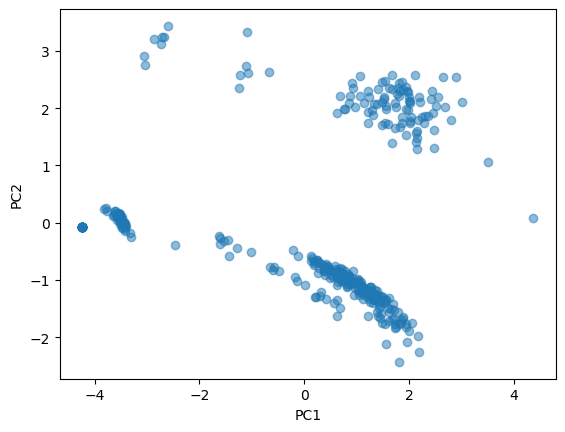

In [9]:
#plot the two principal components
plt.scatter(pcaDF['PC1'], pcaDF['PC2'], alpha = 0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
plt.close()

# Clustering with 2 PCs

(88, 3)
(189, 3)
(79, 3)
(13, 3)


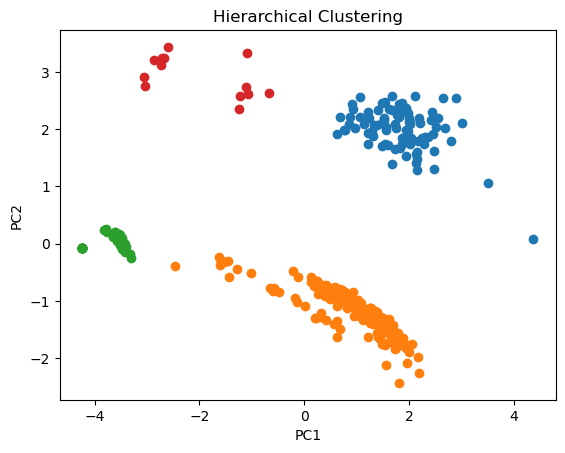

In [15]:
#hierarchical clustering
pcaDFk = pcaDF[["PC1","PC2"]] 
k = 4
agg = AgglomerativeClustering(n_clusters=k, linkage='average').fit(pcaDFk)
cs = agg.labels_
pcaDFk["cluster"] = cs

#divide by cluster
clist = []
for n in set(pcaDFk["cluster"]):
    c = pcaDFk[pcaDFk["cluster"] == n]
    clist.append(c)
    print(c.shape)

#plot
plt.figure()
for c in clist:
    plt.scatter(c["PC1"], c["PC2"])
plt.title("Hierarchical Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
plt.close()

[2515.332569027002, 993.4633407371864, 864.9799534761041, 212.36139110002551, 199.07787776963602, 128.95181552035288, 118.66194282907615, 111.16436998575702]


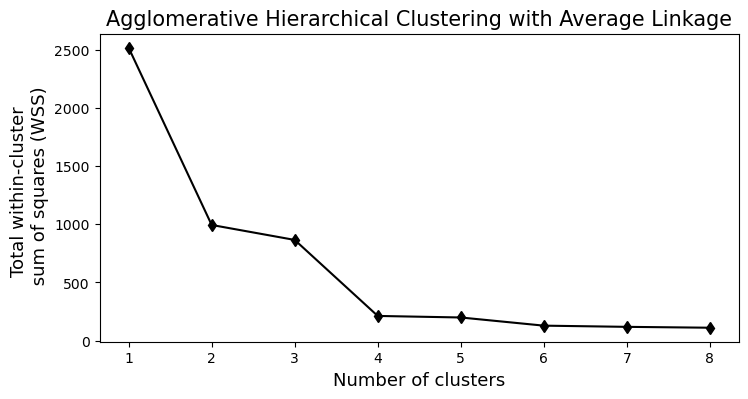

In [16]:
from sklearn.cluster import AgglomerativeClustering

def wss_calculation(K, data):
    WSS = []
    for i in range(K):
        cluster = AgglomerativeClustering(n_clusters= i+1, linkage='average')  
        cluster.fit_predict(data)
        # cluster index
        label = cluster.labels_
        wss = []
        for j in range(i+1):
            # extract each cluster according to its index
            idx = [t for t, e in enumerate(label) if e == j]
            cluster = data[idx,]
            # calculate the WSS:
            cluster_mean = cluster.mean(axis=0)
            distance = np.sum(np.abs(cluster - cluster_mean)**2,axis=-1)
            wss.append(sum(distance))
        WSS.append(sum(wss))
    return WSS

WSS=wss_calculation(8, pcaDF[["PC1","PC2"]].to_numpy())

cluster_range = range(1, 9)

print(WSS)
plt.figure(figsize=(8.25,4))
plt.title('Agglomerative Hierarchical Clustering with Average Linkage', size = 15)
plt.xlabel('Number of clusters', size = 13)
plt.ylabel('Total within-cluster \n sum of squares (WSS)', size = 13)
plt.plot(cluster_range, WSS, marker = "d", color = 'k')
plt.savefig("images/WSS.png", bbox_inches= 'tight')
plt.show()
plt.close()

In [ ]:
last = linked[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)

plt.figure(figsize=(10,5))
plt.title('Optimal number of cluster')
plt.xlabel('Number of cluster')

plt.plot(idxs, last_rev, marker = "o", label="distance")

accele = np.diff(last, 2)  # 2nd derivative of the distances
accele_rev = accele[::-1]
plt.plot(idxs[:-2] + 1, accele_rev, marker = "x", label = "2nd derivative of distance growth")

plt.legend()
plt.show()
k = accele_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

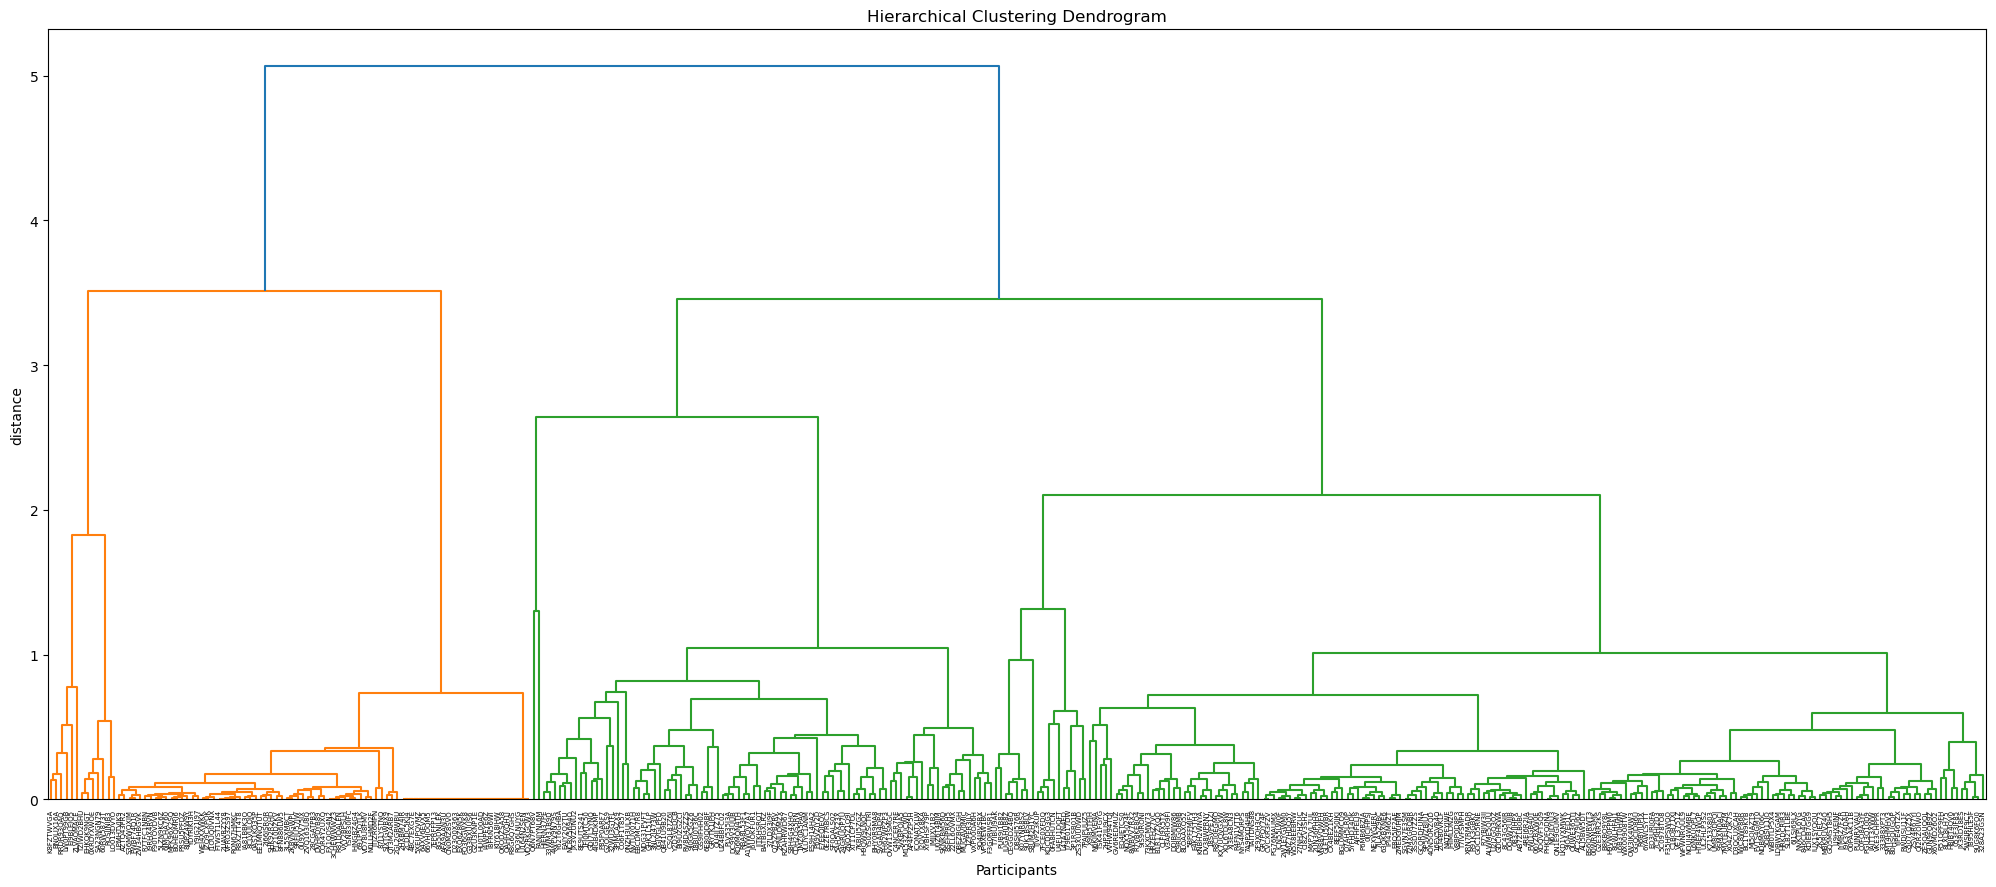

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pcaDF[["PC1","PC2"]].to_numpy(), 'average')
statesList = data3.iloc[:, 0].values

plt.figure(figsize=(25, 10)) 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Participants')
plt.ylabel('distance')
dendrogram(linked,
           orientation='top', #The direction to plot the dendrogram
                              #The root at the top, and descendent links going downwards
           labels=statesList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

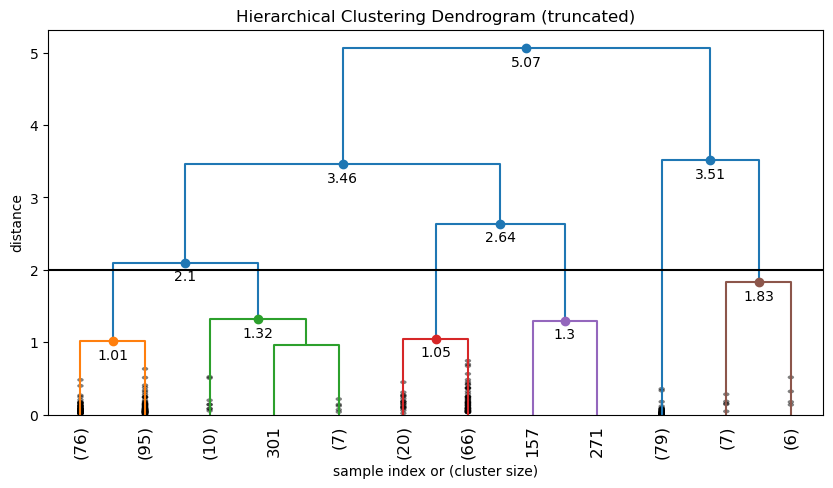

In [12]:
# the following code is from
# [https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/]
def fancy_dendrogram(*args, **kwargs):
    plt.figure(figsize=(10,5))
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(
    linked,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=2,  # a horizontal cut-off line
)

plt.show()